In [66]:
# Utility Functions
import re
import numpy as np
import torch
torch.manual_seed(42)

def getTextFromFile(file_path = './books/harry_potter.txt', chunkSize=5000 ):
    with open(file_path, 'r') as file:
        book_text = file.read(chunkSize)
    book_text_lower = book_text.lower()
    # text =  re.sub(r'[^a-zA-Z\s]', '', book_text_lower) #re.sub(r'[^\w\s]', '', book_text_lower)
    text = re.sub(r'[^a-zA-Z\s]', '', book_text_lower.replace('\n', ''))
    return text

text = getTextFromFile()

# Create Character Mappings 
chars = sorted(list(set(text)))
n_chars = len(chars)
char_to_index = {ch:i for i,ch in enumerate(chars)}
index_to_char = {i:ch for i,ch in enumerate(chars)}


def one_hot_encode(char):
    vector = np.zeros(n_chars)
    # print(char)
    # print(char_to_index[char])
    vector[char_to_index[char]] = 1
    return vector


def generateTrainingData():
    # Prepare input sequence and corresponding target characters 
    seq_length = 100
    X_data, y_data = [] , []

    for i in range(0,len(text)-seq_length,1):
        seq_in =  text[i:i+seq_length]
        seq_out = text[i+seq_length]
        X_data.append([one_hot_encode(char) for char in seq_in ])
        y_data.append([one_hot_encode(seq_out)])

    # Convert data to pytorch tensors 
    X = torch.tensor(X_data, dtype=torch.float32)
    y = torch.tensor(y_data, dtype=torch.long)  # Change the data type to torch.long

    # print(f" X shape : {X} y shape {y}")
    return X,y



In [67]:
from torch import nn
import torch

# text="An apple a day keeps the doctor away"

X,y= generateTrainingData()

class CharacterGenerator(nn.Module):
    def __init__(self,embedding_vector):
        super().__init__()
        self.rnn = nn.RNN(embedding_vector,32)
        self.lin = nn.Linear(32,embedding_vector)

    def forward(self,x):
        output , hidden = self.rnn(x)
        # print(f"Note =>>>>>>>>>>>>>> How Last of output is same as hidden")
        # print(f"  output {output} hidden {hidden}")
        return  torch.sigmoid(self.lin(output))

n_train_example, seq_len , embedding_vector = X.shape

print(f"Xshape {X.shape} \nYshape {y.shape}")
print(f"n_train_example : {n_train_example}\nseq_len : {seq_len}\nembedding_vector : {embedding_vector}\n")

# # Our Model is a Many to One Model : It takes a bunch of sequence and ouputs the next Character
model = CharacterGenerator(embedding_vector)
print(f"model {model}")


Xshape torch.Size([4566, 100, 27]) 
Yshape torch.Size([4566, 1, 27])
n_train_example : 4566
seq_len : 100
embedding_vector : 27

model CharacterGenerator(
  (rnn): RNN(27, 32)
  (lin): Linear(in_features=32, out_features=27, bias=True)
)


In [68]:
model(X[0][0:4])

tensor([[0.5159, 0.4943, 0.5104, 0.5435, 0.5044, 0.4818, 0.4843, 0.5545, 0.4502,
         0.5603, 0.5384, 0.5184, 0.5562, 0.5021, 0.5272, 0.4842, 0.5004, 0.5325,
         0.4875, 0.4799, 0.5299, 0.4756, 0.4726, 0.5087, 0.5372, 0.5224, 0.5127],
        [0.4918, 0.4973, 0.4562, 0.5294, 0.5300, 0.4670, 0.5492, 0.5477, 0.4703,
         0.5334, 0.5402, 0.4963, 0.5564, 0.5308, 0.5157, 0.4679, 0.4746, 0.5407,
         0.4952, 0.4932, 0.5464, 0.4726, 0.4708, 0.4930, 0.5799, 0.5322, 0.5329],
        [0.5196, 0.5080, 0.4721, 0.5395, 0.5380, 0.4493, 0.4901, 0.5333, 0.4631,
         0.5284, 0.5541, 0.5111, 0.5318, 0.5132, 0.5390, 0.4600, 0.4805, 0.5162,
         0.4815, 0.4989, 0.5028, 0.4828, 0.4731, 0.5131, 0.5635, 0.5153, 0.5542],
        [0.5144, 0.5052, 0.4691, 0.5346, 0.5183, 0.4512, 0.4975, 0.5312, 0.4989,
         0.5460, 0.5399, 0.4918, 0.5594, 0.5129, 0.5486, 0.4470, 0.4948, 0.5404,
         0.4649, 0.5016, 0.5027, 0.4789, 0.4977, 0.4944, 0.5306, 0.5132, 0.5281]],
       grad_fn=<Sigmoid

epoch 0 loss 3.3044769763946533
epoch 1 loss 3.301929235458374
epoch 2 loss 3.2994906902313232
epoch 3 loss 3.2971532344818115
epoch 4 loss 3.2949063777923584
epoch 5 loss 3.2927379608154297
epoch 6 loss 3.2906322479248047
epoch 7 loss 3.2885727882385254
epoch 8 loss 3.2865419387817383
epoch 9 loss 3.2845213413238525
epoch 10 loss 3.2824926376342773
epoch 11 loss 3.2804386615753174
epoch 12 loss 3.2783422470092773
epoch 13 loss 3.276186227798462
epoch 14 loss 3.2739551067352295
epoch 15 loss 3.271632432937622
epoch 16 loss 3.2692019939422607
epoch 17 loss 3.2666478157043457
epoch 18 loss 3.2639527320861816
epoch 19 loss 3.2611000537872314
epoch 20 loss 3.2580726146698
epoch 21 loss 3.2548530101776123
epoch 22 loss 3.251424789428711
epoch 23 loss 3.247771978378296
epoch 24 loss 3.2438807487487793
epoch 25 loss 3.239738702774048
epoch 26 loss 3.2353363037109375
epoch 27 loss 3.230670213699341
epoch 28 loss 3.2257421016693115
epoch 29 loss 3.2205631732940674
epoch 30 loss 3.21515417098999

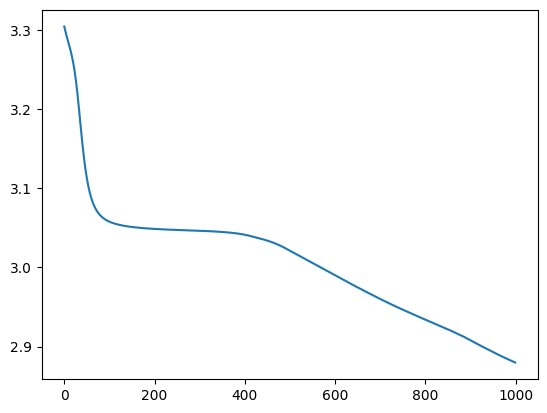

In [69]:
# Loss Criteria , Optimizer
"""
Output of the model is a probabilitic distribution, as I am using sigmoid in the end. 
So basically , the complete vector of size embedding vector , the value will represent the 
characters.  And Target character is a one_hot encoded vector of size embeding_vector. 

So , The right error function would be cross Entropy loss for MultiClassClassificaition
"""

criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr =0.001)

epochs = 1000
losses = []

def generateNextChar(text):
    X = []
    for idx,char in enumerate(text):
        X.append(one_hot_encode(char))
    X=torch.tensor(np.array(X),dtype=torch.float32)
    y=model(X)
    # print(index_to_char[int(torch.argmax(y[-1]))])
    return index_to_char[int(torch.argmax(y[-1]))]
    


for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(X)
    output_view = output[:,-1,:]
    # print(output.shape, y.shape, output_view.shape)
    loss = criteria(output_view.float(),y.squeeze().float())
    losses.append(loss.item())
    
    print(f"epoch {epoch} loss {loss}")
    loss.backward()
    optimizer.step()
    generateNextChar("harr")


from matplotlib import pyplot as plt
plt.plot(losses)

In [71]:
def generateN_NextChar(text,n=30):
    for i in range(n):
        nextChar = generateNextChar(text)
        text=text+str(nextChar)
        text = text.replace('\n', ' ')
        print(f"text:{text} len: {len(text)}")


generateN_NextChar("harr")

text:harr  len: 5
text:harr   len: 6
text:harr  a len: 7
text:harr  a  len: 8
text:harr  a   len: 9
text:harr  a    len: 10
text:harr  a   o len: 11
text:harr  a   o  len: 12
text:harr  a   o   len: 13
text:harr  a   o  o len: 14
text:harr  a   o  or len: 15
text:harr  a   o  or  len: 16
text:harr  a   o  or   len: 17
text:harr  a   o  or  o len: 18
text:harr  a   o  or  o  len: 19
text:harr  a   o  or  o   len: 20
text:harr  a   o  or  o  o len: 21
text:harr  a   o  or  o  o  len: 22
text:harr  a   o  or  o  o   len: 23
text:harr  a   o  or  o  o  o len: 24
text:harr  a   o  or  o  o  o  len: 25
text:harr  a   o  or  o  o  o   len: 26
text:harr  a   o  or  o  o  o  o len: 27
text:harr  a   o  or  o  o  o  o  len: 28
text:harr  a   o  or  o  o  o  o   len: 29
text:harr  a   o  or  o  o  o  o  o len: 30
text:harr  a   o  or  o  o  o  o  o  len: 31
text:harr  a   o  or  o  o  o  o  o   len: 32
text:harr  a   o  or  o  o  o  o  o  o len: 33
text:harr  a   o  or  o  o  o  o  o  o  len: 34
